In [1]:
# If you haven't installed the bwb package yet, run the following command
# !pip install git+https://github.com/ottomossei/bwb

## import modules

In [8]:
import datetime
from bwb.db import LocalDB
import bwb.basicstrategy as bst
import bwb.indicator as indicator

## Load candlestick

In [3]:
issue = 'AAPL'
d = LocalDB()
candle = d.loader(issue, start = '2020/01/01', end = datetime.date.today())
candle

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2020-01-02,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.207466
2020-01-03,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.486023
2020-01-06,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.071579
2020-01-07,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.723213
2020-01-08,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.909149
...,...,...,...,...,...,...,...
2021-06-21,2021-06-21,132.410004,129.210007,130.300003,132.300003,79663300.0,132.300003
2021-06-22,2021-06-22,134.080002,131.619995,132.130005,133.979996,74783600.0,133.979996
2021-06-23,2021-06-23,134.320007,133.229996,133.770004,133.699997,60214200.0,133.699997


## Select basic strategy

In [4]:
# MACD Cross Strategy
strategy = bst.MACDCross
strategy.candle = candle

## backtest

In [5]:
tester = bst.Btest(
        data = candle,
        strategy = strategy,
        cash = 1000,
        commission = 0.00495,
        margin = 1.0,
        trade_on_close = True,
        exclusive_orders = True
        )
output = tester.run()
output

Start                     2020-01-02 00:00:00
End                       2021-06-25 00:00:00
Duration                    540 days 00:00:00
Exposure Time [%]                   60.695187
Equity Final [$]                  1492.897455
Equity Peak [$]                   1513.602419
Return [%]                          49.289745
Buy & Hold Return [%]               77.273178
Return (Ann.) [%]                   30.996846
Volatility (Ann.) [%]               31.331318
Sharpe Ratio                         0.989325
Sortino Ratio                        2.024431
Calmar Ratio                         1.932383
Max. Drawdown [%]                  -16.040736
Avg. Drawdown [%]                    -3.78492
Max. Drawdown Duration      297 days 00:00:00
Avg. Drawdown Duration       35 days 00:00:00
# Trades                                   15
Win Rate [%]                        53.333333
Best Trade [%]                      22.482237
Worst Trade [%]                     -5.042398
Avg. Trade [%]                    

## Save .html

In [6]:
p = tester.plot(issue=issue)

## Show with mplfinance

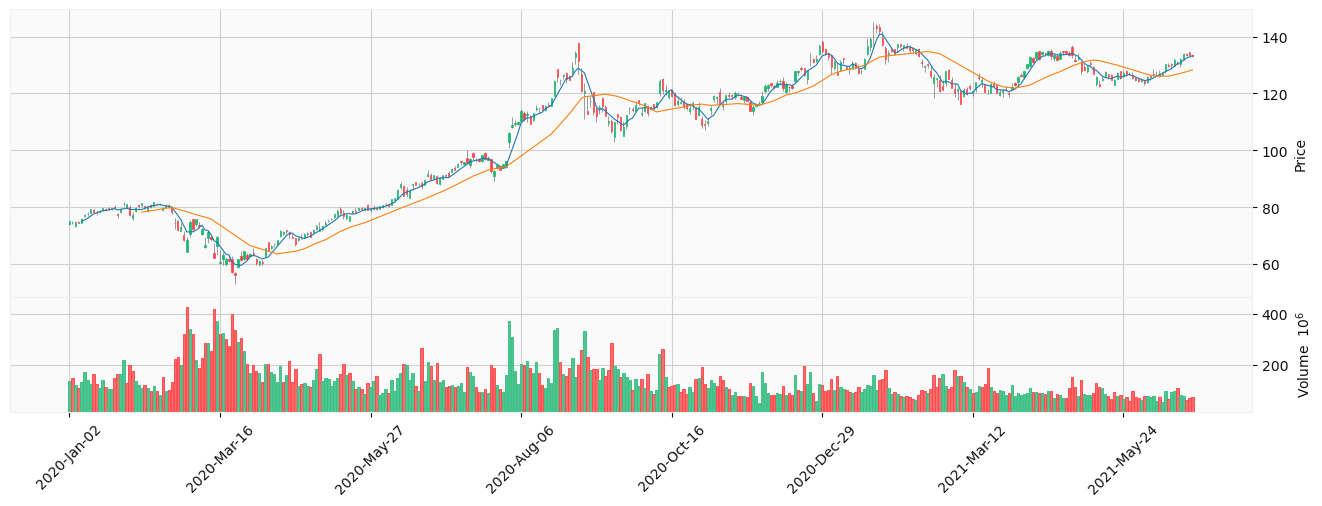

In [7]:
import mplfinance as mpf
# Show with Jupyter Notebook
mpf.plot(candle, type='candle', figratio=(12,4),
         volume=True, mav=(5, 25), style='yahoo')